In [2]:
import numpy as np

In [3]:
import os
os.environ['KAGGLE_USERNAME'] = "thrisharajkumar"
os.environ['KAGGLE_KEY'] = "e95da74a77f5a2ed401af2d47fd9b90d"

In [4]:
!kaggle datasets download tawsifurrahman/covid19-radiography-database

covid19-radiography-database.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip covid19-radiography-database.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
 

In [6]:
len(os.listdir('COVID-19_Radiography_Dataset/COVID/images'))

3616

In [7]:
len(os.listdir('COVID-19_Radiography_Dataset/Normal/images'))

10192

In [8]:
import cv2

In [9]:
img = cv2.imread('COVID-19_Radiography_Dataset/Normal/images/Normal-10005.png')

In [10]:
import matplotlib.pyplot as plt

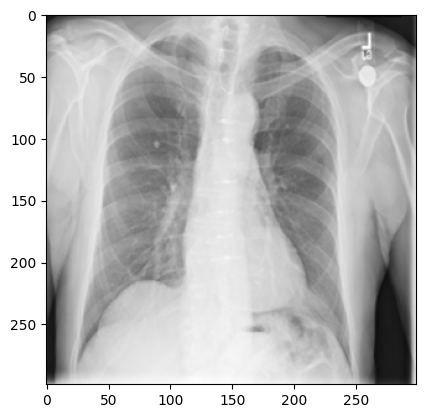

In [11]:
plt.imshow(img)

In [12]:
img.shape

(299, 299, 3)

In [13]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_excel('COVID-19_Radiography_Dataset/COVID.metadata.xlsx')

In [15]:
df.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [16]:
urls = os.listdir('COVID-19_Radiography_Dataset/COVID/images')

In [17]:
path = "COVID-19_Radiography_Dataset/COVID/images/" + urls[0]

In [18]:
path

'COVID-19_Radiography_Dataset/COVID/images/COVID-2655.png'

In [19]:
def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
    img = img / 255.0
    #print(img_path)
    # if we want to resize the images
    img = cv2.resize(img, (100, 100))
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

In [20]:
covid_path = "COVID-19_Radiography_Dataset/COVID/images"
covidUrl = os.listdir(covid_path)
covidImages, covidTargets = loadImages(covid_path, covidUrl, 1)

In [21]:
len(covidUrl), len(covidImages)

(3616, 3616)

In [22]:
normal_path = "COVID-19_Radiography_Dataset/Normal/images"
normal_urls = os.listdir(normal_path)
normalImages, normalTargets = loadImages(normal_path, normal_urls, 0)

In [23]:
covidImages = np.asarray(covidImages)
normalImages = np.asarray(normalImages)

In [24]:
covidImages.shape

(3616, 100, 100, 3)

In [25]:
normalImages.shape

(10192, 100, 100, 3)

In [26]:
data = np.r_[covidImages, normalImages]

In [27]:
data.shape

(13808, 100, 100, 3)

In [28]:
targets = np.r_[covidTargets, normalTargets]

In [29]:
targets.shape

(13808,)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.25)

In [32]:
import tensorflow as tf

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [34]:
model = Sequential([
    Conv2D(32, 3, input_shape=(100,100,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 16)       0

In [36]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

Epoch 1/10
4/4 [==============================] - 1s 61ms/step - loss: 0.6935 - accuracy: 0.5600 - val_loss: 0.6841 - val_accuracy: 0.5800
Epoch 2/10
4/4 [==============================] - 0s 10ms/step - loss: 0.6907 - accuracy: 0.5400 - val_loss: 0.6846 - val_accuracy: 0.5800
Epoch 3/10
4/4 [==============================] - 0s 8ms/step - loss: 0.6886 - accuracy: 0.5500 - val_loss: 0.6855 - val_accuracy: 0.5800
Epoch 4/10
4/4 [==============================] - 0s 9ms/step - loss: 0.6860 - accuracy: 0.5600 - val_loss: 0.6861 - val_accuracy: 0.5800
Epoch 5/10
4/4 [==============================] - 0s 16ms/step - loss: 0.6843 - accuracy: 0.5600 - val_loss: 0.6866 - val_accuracy: 0.5800
Epoch 6/10
4/4 [==============================] - 0s 16ms/step - loss: 0.6828 - accuracy: 0.5600 - val_loss: 0.6873 - val_accuracy: 0.6000
Epoch 7/10
4/4 [==============================] - 0s 10ms/step - loss: 0.6811 - accuracy: 0.5700 - val_loss: 0.6886 - val_accuracy: 0.5600
Epoch 8/10
4/4 [=============

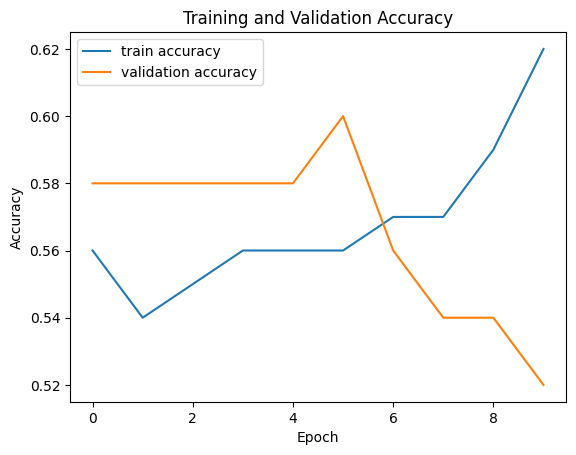

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Generate some example data for demonstration
# Make sure to replace this with your actual data
X_train = np.random.rand(100, 10)
y_train = np.random.randint(2, size=100)
X_val = np.random.rand(50, 10)
y_val = np.random.randint(2, size=50)

# Define a simple neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10,)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()


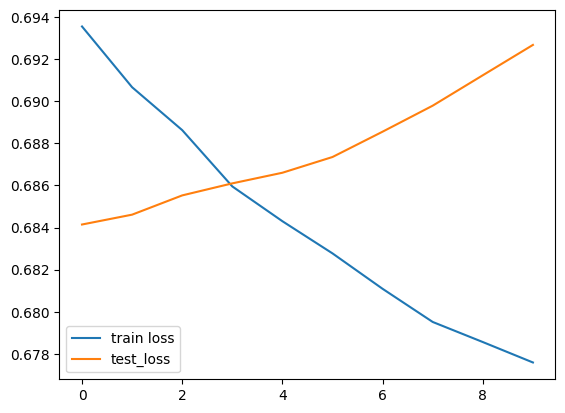

In [5]:
plt.plot(model.history.history['loss'], label = 'train loss')
plt.plot(model.history.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()